# pytorch

## 关系拟合 (回归)

In [ ]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss



In [ ]:
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()
#plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [ ]:
ls *.png

## 区分类型 (分类)

# pytorch learning hands-on

In [ ]:
import torch;
torch.__version__

## getting_started

In [ ]:
import torch
import numpy as np

In [ ]:
uninitialized = torch.Tensor(3, 2)
rand_initialized = torch.rand(3, 2)

print(uninitialized)
print(rand_initialized)

In [ ]:
# Shape of the tensor
size = rand_initialized.size()
print(size)

# Numpy like API for shape
shape = rand_initialized.shape
print(shape)

# Both are same
print(shape == size)

# indexing through the shape object, same as python tuple
print(shape[0])
print(shape[1])

In [ ]:
# Operations
x = torch.ones(3, 2)

# normal operators
y = torch.ones(3, 2) * 2
y = y + 2
z = torch.ones(2, 1)
# x -> 3x2
# y -> 3x2
# z -> 2x1
x_y = x * y  # element wise mul -> 3x2
x_y_z = x_y @ z  # matrix multiplication, (3x2) . (2x1) -> a 3x1 matrix
print(x)
print(y)
print(z)
print(x_y)
print(x_y_z)

In [ ]:
# Addition 1 + 2 > 3
z = x + y  # using operators
print(z)

z = x.add(y)  # using pytorch function, torch.add does the same
print(z)

In [ ]:
z = x.add_(y)  # in place addition.
print(z)
print(x)  # value after addition

In [ ]:
# multiplication
x = torch.rand(2, 3)
y = torch.rand(3, 4)
x.matmul(y)  # tensor of size 2x4

In [ ]:
# number of elements in a tensor
x = torch.rand(2, 3)
print(x.numel())

In [ ]:
# Slicing, joining, indexing and mutating
# pythonic indexing
x = torch.rand(2, 3, 4)
x_with_2n3_dimension = x[1, :, :]
scalar_x = x[1, 1, 1]  # first value from each dimension
scalar_x

In [ ]:
# numpy like slicing
x = torch.rand(2, 3)
print(x[:, 1:])  # skipping first column
print(x[:-1, :])  # skipping last row

In [ ]:
# transpose
x = torch.rand(2, 3)
print(x)
print(x.t())  # size 3x2

In [ ]:
# concatenation and stacking
x = torch.rand(2, 3)
concat = torch.cat((x, x))
print(concat)  # Concatenates 2 tensors on default zeroth dimension

In [ ]:
x = torch.rand(2, 3)
concat = torch.cat((x, x), dim=1)
print(concat)  # Concatenates 2 tensors on first dimension

In [ ]:
x = torch.rand(2, 3)
stacked = torch.stack((x, x), dim=0)
print(stacked)  # concatenated a tensor to new dimension, returns 2x2x3 tensor

In [ ]:

# split: you can use chunk as well
x = torch.rand(2, 3)
splitted = x.split(split_size=2, dim=0)  # get 2 tensors of 2 x 2 and 1 x 2 size
print(splitted)

In [ ]:

# squeeze and unsqueeze
x = torch.rand(3, 2, 1)  # a tensor of size 3 x 2 x 1
squeezed = x.squeeze()
print(squeezed)  # remove the 1 sized demension

In [ ]:
x = torch.rand(3)
with_fake_dimension = x.unsqueeze(0)
print(with_fake_dimension)  # added a fake zeroth dimension

In [ ]:
x=torch.ones(2,2)
xv=x.view(-1)
xn=x.numpy()

In [ ]:
x

In [ ]:
xv

In [ ]:
xn

In [ ]:
# to numpy
th_tensor = torch.rand(3, 2)
np_tensor = th_tensor.numpy()
print(type(th_tensor), type(np_tensor))

In [ ]:

# from numpy
np_tensor = np.random.rand(3, 2)
th_tensor = torch.from_numpy(np_tensor)
print(type(np_tensor), type(th_tensor))

In [ ]:
# more fun with th-np conversion
th_arange = torch.arange(1, 4)
np_arange = np.arange(1, 4)
print('would torch-numpy bridge work -> ', th_arange.numpy() == np_arange)



In [ ]:
# GPU (CUDA) tensors
x = torch.rand(4, 3)
y = torch.rand(4, 3)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = x + y  # operation executed on GPU
else:
    print('No GPU available')

In [ ]:
#this saving and loading method is not the recommended one.
#check here for more info pytorch.org/docs/master/notes/serialization.html
#saving model
x = torch.rand(3, 2)
torch.save(x, 'path')
print(x)
#load
x = torch.load('path')
#Find more operations here: http://pytorch.org/docs/master/torch.html
print(x)

In [ ]:
pwd

In [ ]:
ls ./path

## A Simple Neural Network

## 数据集

In [ ]:
import numpy as np

def binary_encoder(input_size):
    def wrapper(num):
        ret = [int(i) for i in '{0:b}'.format(num)]
        return [0] * (input_size - len(ret)) + ret
    return wrapper


def decoder(array):
    ret = 0
    for i in array:
        ret = ret * 2 + int(i)
    return ret


def training_test_gen(x, y):
    assert len(x) == len(y)
    indices = np.random.permutation(range(len(x)))
    split_size = int(0.9 * len(indices))
    trX = x[indices[:split_size]]
    trY = y[indices[:split_size]]
    teX = x[indices[split_size:]]
    teY = y[indices[split_size:]]
    return trX, trY, teX, teY


def get_pytorch_data(input_size=10, limit=1000):
    x = []
    y = []
    encoder = binary_encoder(input_size)
    for i in range(limit):
        x.append(encoder(i))
        if i % 15 == 0:
            y.append(0)
        elif i % 5 == 0:
            y.append(1)
        elif i % 3 == 0:
            y.append(2)
        else:
            y.append(3)
    return training_test_gen(np.array(x), np.array(y))


def get_numpy_data(input_size=10, limit=1000):
    x = []
    y = []
    encoder = binary_encoder(input_size)
    for i in range(limit):
        x.append(encoder(i))
        if i % 15 == 0:
            y.append([1, 0, 0, 0])
        elif i % 5 == 0:
            y.append([0, 1, 0, 0])
        elif i % 3 == 0:
            y.append([0, 0, 1, 0])
        else:
            y.append([0, 0, 0, 1])
    return training_test_gen(np.array(x), np.array(y))


def check_fizbuz(i):
    if i % 15 == 0:
        return 'fizbuz'
    elif i % 5 == 0:
        return 'buz'
    elif i % 3 == 0:
        return 'fiz'
    else:
        return 'number'

In [ ]:
binary_encoder(2)(2)

In [ ]:
decoder((1,0,1,0))

In [ ]:
epochs = 5
batches = 64
lr = 0.01
input_size = 10
output_size = 4
hidden_size = 100

In [ ]:
trX, trY, teX, teY = get_numpy_data(input_size)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dtype = torch.float64


x = torch.from_numpy(trX).to(device=device, dtype=dtype)
y = torch.from_numpy(trY).to(device=device, dtype=dtype)

print(x.grad, x.grad_fn, x)
# None None tensor([[...]])

In [ ]:
w1 = torch.randn(input_size, hidden_size, requires_grad=True, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, requires_grad=True, device=device, dtype=dtype)

print(w1.grad, w1.grad_fn, w1)
# None None tensor([[...]])

b1 = torch.zeros(1, hidden_size, requires_grad=True, device=device, dtype=dtype)
b2 = torch.zeros(1, output_size, requires_grad=True, device=device, dtype=dtype)

In [ ]:
no_of_batches = int(len(trX) / batches)
print(no_of_batches,len(trX),batches)

In [ ]:
no_of_batches = int(len(trX) / batches)
for epoch in range(epochs):
    for batch in range(no_of_batches):
        start = batch * batches
        end = start + batches
        x_ = x[start:end]
        y_ = y[start:end]

        a2 = x_.matmul(w1)
        a2 = a2.add(b1)

        print(a2.grad, a2.grad_fn, a2)
        # None <AddBackward0 object at 0x7f5f3b9253c8> tensor([[...]])

        h2 = a2.sigmoid()

        a3 = h2.matmul(w2)
        a3 = a3.add(b2)
        hyp = a3.sigmoid()

        error = hyp - y_
        output = error.pow(2).sum() / 2.0
        output.backward()

        print(x.grad, x.grad_fn, x)
        # None None tensor([[...]])
        print(w1.grad, w1.grad_fn, w1)
        # tensor([[...]], None, tensor([[...]]
        print(a2.grad, a2.grad_fn, a2)
        # None <AddBackward0 object at 0x7f5f3d42c780> tensor([[...]])

        # Direct manipulation of data outside autograd is not allowed
        # when grad flag is True
        with torch.no_grad():
            w1 -= lr * w1.grad
            w2 -= lr * w2.grad
            b1 -= lr * b1.grad
            b2 -= lr * b2.grad
        # Making gradients zero. This is essential otherwise, gradient
        # from next iteration accumulates
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
    if epoch % 10:
        print(epoch, output.item())

# traversing the graph using .grad_fn
print(output.grad_fn)
# <DivBackward0 object at 0x7eff00ae3ef0>
print(output.grad_fn.next_functions[0][0])
# <SumBackward0 object at 0x7eff017b4128>
print(output.grad_fn.next_functions[0][0].next_functions[0][0])
# <PowBackward0 object at 0x7eff017b4128>


In [ ]:
# test
with torch.no_grad():
    x = torch.from_numpy(teX).to(device=device, dtype=dtype)
    y = torch.from_numpy(teY).to(device=device, dtype=dtype)

    a2 = x.matmul(w1)
    a2 = a2.add(b1)
    h2 = a2.sigmoid()

    a3 = h2.matmul(w2)
    a3 = a3.add(b2)
    hyp = a3.sigmoid()
    error = hyp - y
    output = error.pow(2).sum() / 2.
    outli = ['fizbuz', 'buz', 'fiz', 'number']
    for i in range(len(teX)):
        num = decoder(teX[i])
        print(
            'Number: {} -- Actual: {} -- Prediction: {}'.format(
                num, check_fizbuz(num), outli[hyp[i].max(0)[1].item()]))
    print('Test loss: ', output.item() / len(x))
    accuracy = hyp.max(1)[1] == y.max(1)[1]
    print('accuracy: ', accuracy.sum().item() / len(accuracy))

## 图2.4

In [ ]:
import torch
inputs = torch.FloatTensor([2])
weight = torch.rand(1, requires_grad=True)
bias = torch.ones(1, requires_grad=True)
t = inputs * weight
out = t + bias
out.backward()

In [ ]:
weight.grad

In [ ]:
bias.grad

## FizBuzNet

In [ ]:
import torch.nn
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import time

### 2.4.1

In [ ]:
class FizBuzNet(nn.Module):
    """
    2 layer network for predicting fiz or buz
    param: input_size -> int
    param: output_size -> int
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(FizBuzNet, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, batch):
        hidden = self.hidden(batch)
        activated = torch.sigmoid(hidden)
        out = self.out(activated)
        return out

In [ ]:
class Linear(torch.nn.Module):
    def __init__(self, in_features, out_features, bias):
        super(Linear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.bias = torch.nn.Parameter(torch.Tensor(out_features))

    def forward(self, input):
        return input.matmul(self.weight.t()) + self.bias

In [ ]:
trX, trY, teX, teY = get_pytorch_data(input_size, limit=1000)
if torch.cuda.is_available():
    xtype = torch.cuda.FloatTensor
    ytype = torch.cuda.LongTensor
else:
    xtype = torch.FloatTensor
    ytype = torch.LongTensor
x = torch.from_numpy(trX).type(xtype)
y = torch.from_numpy(trY).type(ytype)

In [ ]:
epochs

In [ ]:
net = FizBuzNet(input_size, hidden_size, output_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
total_time = []
no_of_batches = int(len(trX) / batches)
for epoch in range(epochs):
    for batch in range(no_of_batches):
        start = batch * batches
        end = start + batches
        x_ = x[start:end]
        y_ = y[start:end]
        start = time.time()
        hyp = net(x_)
        loss = loss_fn(hyp, y_)
        optimizer.zero_grad()
        loss.backward()
        total_time.append(time.time() - start)
        optimizer.step()
    if epoch % 10:
        print(epoch, loss.item())
total_sum = sum(total_time)
total_len = len(total_time)
print(total_sum, total_len, total_sum / total_len)


# Test
with torch.no_grad():
    x = torch.from_numpy(teX).type(xtype)
    y = torch.from_numpy(teY).type(ytype)
    hyp = net(x)
    output = loss_fn(hyp, y)
    outli = ['fizbuz', 'buz', 'fiz', 'number']
    for i in range(len(teX)):
        num = decoder(teX[i])
        print(
            'Number: {} -- Actual: {} -- Prediction: {}'.format(
                num, check_fizbuz(num), outli[hyp[i].max(0)[1].item()]))
    print('Test loss: ', output.item() / len(x))
    accuracy = hyp.max(1)[1] == y
    print('accuracy: ', accuracy.sum().item() / len(accuracy))

torch.save(net.state_dict(), 'fizbuz_model.pth')

In [ ]:
ls *.pth

## 3.DLWorkFlow

In [ ]:
from dataclasses import dataclass
from torch.utils.data import Dataset, DataLoader


@dataclass(eq=False)
class FizBuzDataset(Dataset):
    """ Dataset class sublcassed from torch's dataset utility
    Args:
            input_size (int): input size of a datapoint or in this case, the binary size
            start (int): whole number from where the dataset starts counting, exclusive
            end (int): whole number till where the dataset keeps counting, inclusive
    """
    input_size: int = 10
    start: int = 0
    end: int = 1000

    def encoder(self, num):
        ret = [int(i) for i in '{0:b}'.format(num)]
        return [0] * (self.input_size - len(ret)) + ret

    def __getitem__(self, idx):
        idx += self.start
        x = self.encoder(idx)
        if idx % 15 == 0:
            y = [1, 0, 0, 0]
        elif idx % 5 == 0:
            y = [0, 1, 0, 0]
        elif idx % 3 == 0:
            y = [0, 0, 1, 0]
        else:
            y = [0, 0, 0, 1]
        return x, y

    def __len__(self):
        """ setting the length to a limit. Theoretically fizbuz dataset can have
        infinitily long dataset but dataloaders fetches len(dataset) to loop decide
        what's the length. Returning any number from this function sets that as the
        length of the dataset
        """
        return self.end - self.start





In [ ]:
dataset = FizBuzDataset()

In [ ]:
num=22
ret = [int(i) for i in '{0:b}'.format(num)]
print(ret)

In [ ]:
dataset.encoder(num)

In [ ]:
len(dataset)

In [ ]:
#if __name__ == '__main__':
dataset = FizBuzDataset()
for i in range(len(dataset)):
    x, y = dataset[i]

In [ ]:
dataset

In [ ]:
x,y

In [ ]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)

In [ ]:
dataloader

for data in iter(dataset):
    yield collate_fn(data)

dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)
for batch in dataloader:
    print(batch)

In [ ]:
#Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install torchvision

#pip install torchvision

In [ ]:
!{sys.executable} -m pip install torchtext

## pip

In [ ]:
#Install a pip package in the current Jupyter kernel
import sys

#!{sys.executable} -m pip install mglearn #torchvision
#!{sys.executable} -m pip install pydotplus #torchvision
#!{sys.executable} -m pip install graphviz #torchvision
!{sys.executable} -m pip install pyparsing #torchvision


## 4.computer vision

In [ ]:
cnn

## 5.SequentialDataProcessing

In [ ]:
rnn

### 5.5 分类器

## 6.GenerativeNetworks

In [ ]:
自回归模型



In [ ]:
生成对抗网络 GAN

## 7.ReinforcementLearning

In [ ]:
无监督学习

### 马尔可夫决策树 MDP


## 8.PyTorchInProduction

In [ ]:
Flask

In [ ]:
gunicorn

In [ ]:
netron

# pytorch machinelearning

## 2.4.2 PCA reduce

In [ ]:
from sklearn.datasets import load_iris  
data=load_iris()  	
y=data.target  
x=data.data  
n_components=2

from sklearn.decomposition import PCA  
pca=PCA(n_components=n_components)  
reduced_x=pca.fit_transform(x)  

In [ ]:
y

x

reduced_x

In [ ]:
import matplotlib.pyplot as plt  
red_x,red_y=[],[]  
blue_x,blue_y=[],[]  
green_x,green_y=[],[]  
for i in range(len(reduced_x)):  
    if y[i] ==0:  
        red_x.append(reduced_x[i][0])  
        red_y.append(reduced_x[i][1])  
  
    elif y[i]==1:  
        blue_x.append(reduced_x[i][0])  
        blue_y.append(reduced_x[i][1])    
    else:  
       green_x.append(reduced_x[i][0])  
       green_y.append(reduced_x[i][1])   
        
plt.scatter(red_x,red_y,c='r',marker='x',label='Class 1')  
plt.scatter(blue_x,blue_y,c='b',marker='D',label='Class 2')  
plt.scatter(green_x,green_y,c='g',marker='.',label='Class 3')  
plt.legend()
plt.show() 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import mglearn
import matplotlib.pyplot as plt
import numpy as np
#导入数据集


In [ ]:
##

In [ ]:
iris_dataset['data'].shape

In [ ]:
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8,
                        cmap=mglearn.cm3)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#调用sklearn库中的KNN模型
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



In [ ]:
y_pred=knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#调用sklearn库中的KNN模型
knn5=KNeighborsClassifier(n_neighbors=2)
knn5.fit(X_train, y_train)

In [ ]:
y_pred=knn5.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))

## def plot_decision_regions

In [ ]:
# coding: utf-8
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.tree import DecisionTreeClassifier

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')



## DecisionTreeClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
dot_data = export_graphviz(tree_model,
              filled=True,
              rounded=True,
              class_names=['Setosa',
                      'Versicolor',
                      'Virginica'],
              feature_names=['petal length',
                     'petal width'],
             out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

## svm

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
np.random.seed(1)  
X_xor = np.random.randn(200, 2)  
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)  
y_xor = np.where(y_xor, 1, -1)  
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b', marker='x',label='1')  
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s', label='-1')  
plt.xlim([-3, 3])  
plt.ylim([-3, 3])  
plt.legend(loc='best')  
plt.tight_layout()  
plt.show() 


In [ ]:
X_xor.shape

## def plot_decision_regions1

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
from matplotlib.colors import ListedColormap  
def plot_decision_regions1(x,y,model,resolution=0.02):  
	markers = ('s','x','o','^','v')  
	colors = ('red','blue','lightgreen','gray','cyan')  
	cmap = ListedColormap(colors[:len(np.unique(y))])  
	x1_min,x1_max = x[:,0].min() - 1,x[:,0].max() + 1  
	x2_min,x2_max = x[:,1].min() - 1,x[:,1].max() + 1  
	xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),  
		                  np.arange(x2_min,x2_max,resolution))  
	z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)  
	z = z.reshape(xx1.shape)  
	plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)  
	plt.xlim(xx1.min(),xx1.max())  
	plt.ylim(xx2.min(),xx2.max())  
	for idx,cl in enumerate(np.unique(y)):  
	    plt.scatter(x=x[y == cl,0],y=x[y == cl,1],  
		            alpha=0.8,c=cmap(idx),  
	                marker=markers[idx],label=cl)  
	plt.xlabel("x1")  
	plt.ylabel("x2")  
	plt.show()  

In [ ]:
import sklearn

In [ ]:
if __name__ == "__main__":  
    x_xor = np.random.randn(200,2)  
    #将数据集变成一个异或的数据集  
    y_xor = np.logical_xor(x_xor[:,0] > 0,x_xor[:,1] > 0)  
    y_xor = np.where(y_xor,1,-1)  
    svm = sklearn.svm.SVC(kernel="rbf", random_state=0, gamma=0.1, C=1.0)  
    svm.fit(x_xor, y_xor)  
    plot_decision_regions1(x_xor, y_xor, svm) 

In [ ]:
if __name__ == "__main__":  
    x_xor = np.random.randn(200,2)  
    #将数据集变成一个异或的数据集  
    y_xor = np.logical_xor(x_xor[:,0] > 0,x_xor[:,1] > 0)  
    y_xor = np.where(y_xor,1,-1)  
    svm = sklearn.svm.SVC(kernel="poly", degree=2,gamma=1,coef0=0)  
    svm.fit(x_xor, y_xor)  
    plot_decision_regions1(x_xor, y_xor, svm) 

## 6.1 linear regression

In [ ]:
# 线性回归示例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [ ]:
# 载入数据
def load_data(filename):

    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs = np.expand_dims(xs, axis=1)
        ys = np.expand_dims(ys, axis=1)
        return np.asarray(xs), np.asarray(ys)


class LinearClassifier(object):

    def __init__(self):
        self.w = np.zeros((2, 1), dtype=float)

    # 训练模型，求取模型参数
    def train(self, x_train, y_train):
        x_train = np.concatenate([x_train, np.ones_like(x_train)], axis=1).T
        w1 = np.linalg.inv(np.dot(x_train, x_train.T))
        w2 = np.dot(x_train, y_train)
        self.w = np.dot(w1, w2)
        return self.w

    # 预测数据
    def predict(self,x_test):
        x_test = np.concatenate([x_test, np.ones_like(x_test)], axis=1).T
        y_test_pred = np.dot(self.w.T, x_test)
        return y_test_pred.T


In [ ]:
pwd

In [ ]:
'/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/'

In [ ]:
if __name__ == '__main__':

    #X_train, y_train = load_data('../../../dataset/第6章/linear_regression_dataset/train.txt')
    #X_test, y_test = load_data('../../../dataset/第6章/linear_regression_dataset/test.txt')
    X_train, y_train = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/linear_regression_dataset/train.txt')
    X_test, y_test = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/linear_regression_dataset/test.txt')

    # 使用最小二乘法拟合线性方程
    LinearClassifier = LinearClassifier()
    LinearClassifier.train(X_train, y_train)

    y_test_pred = LinearClassifier.predict(X_test)

    #绘制拟合图像
    plt.figure(figsize=(6, 5))

    plt.subplot(111)
    plt.scatter(X_test, y_test, color="steelblue", edgecolors="white", linewidth=2)  # 绘制样本点
    plt.plot(X_test, y_test_pred, color="black", linewidth=2)  # 绘制拟合的模型
    plt.title(u'线性回归')
    plt.xlabel('x', fontsize=13)
    plt.ylabel('y', fontsize=13)

    plt.show()

    # 调用scikit-learn中的API拟合线性方程
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)

    #绘制拟合图像
    plt.figure(figsize=(6, 5))

    plt.subplot(111)
    plt.scatter(X_test, y_test, color="steelblue", edgecolors="white", linewidth=2)  # 绘制样本点
    plt.plot(X_test, y_test_pred, color="black", linewidth=2)  # 绘制拟合的模型
    plt.title(u'线性回归')
    plt.xlabel('x', fontsize=13)
    plt.ylabel('y', fontsize=13)

    plt.show()

In [ ]:
# 多项式回归示例

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 载入数据
def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs = np.expand_dims(xs, axis=1)
        ys = np.expand_dims(ys, axis=1)
        return np.asarray(xs), np.asarray(ys)

In [ ]:
if __name__ == '__main__':
    X_train, y_train = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/train.txt')
    X_test, y_test = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/test.txt')

    # 建立模型
    quadratic = PolynomialFeatures(degree=2)
    X_train_quad = quadratic.fit_transform(X_train)
    X_test_quad = quadratic.fit_transform(X_test)

    regr = LinearRegression()
    regr.fit(X_train_quad, y_train)
    y_test_pred = regr.predict(X_test_quad)

    # 绘制图像
    plt.scatter(X_test, y_test, color='steelblue', edgecolors='white')

    test_sort_idx = X_test.flatten().argsort()
    plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx],
             color='black',
             lw=2,
             linestyle='-')

    plt.title(u"多项式回归")
    plt.xlabel('x', fontsize=13)
    plt.ylabel('y', fontsize=13)
    plt.show()

In [ ]:
if __name__ == '__main__':
    X_train, y_train = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/train.txt')
    X_test, y_test = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/test.txt')

    # 建立模型
    quadratic = PolynomialFeatures(degree=4)
    X_train_quad = quadratic.fit_transform(X_train)
    X_test_quad = quadratic.fit_transform(X_test)

    regr = LinearRegression()
    regr.fit(X_train_quad, y_train)
    y_test_pred = regr.predict(X_test_quad)

    # 绘制图像
    plt.scatter(X_test, y_test, color='steelblue', edgecolors='white')

    test_sort_idx = X_test.flatten().argsort()
    plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx],
             color='black',
             lw=2,
             linestyle='-')

    plt.title(u"多项式回归")
    plt.xlabel('x', fontsize=13)
    plt.ylabel('y', fontsize=13)
    plt.show()

## 6.6.3 正则化回归

In [ ]:
pwd

In [ ]:
# 正则化回归示例

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures


# 载入数据
def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs = np.expand_dims(xs, axis=1)
        ys = np.expand_dims(ys, axis=1)
        return np.asarray(xs), np.asarray(ys)


if __name__ == '__main__':
    X_train, y_train = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/train.txt')
    X_test, y_test = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/polynomial_regression_dataset/test.txt')

    quadratic = PolynomialFeatures(degree=2)
    ridge = Ridge(alpha=0.1)

    # 初始化岭回归拟合数据
    X_quad = quadratic.fit_transform(X_train)
    ridge.fit(X_quad, y_train)
    y_pred = ridge.predict(quadratic.fit_transform(X_test))
    # 绘制拟合图像
    idx = X_test.squeeze().argsort()
    plt.scatter(X_test[idx], y_test[idx], c='steelblue', edgecolor='white', s=70)
    plt.plot(X_test[idx], y_pred[idx], color='black', lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ridge Regression')
    plt.show()

    # 初始化初始化最小绝对收缩与选择算子拟合数据
    quadratic = PolynomialFeatures(degree=2)
    lasso = Lasso(alpha=0.1)
    X_quad = quadratic.fit_transform(X_train)
    lasso.fit(X_quad, y_train)
    y_pred = lasso.predict(quadratic.fit_transform(X_test))
    # 绘制拟合图像
    idx = X_test.squeeze().argsort()
    plt.scatter(X_test[idx], y_test[idx], c='steelblue', edgecolor='white', s=70)
    plt.plot(X_test[idx], y_pred[idx], color='black', lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Lasso Regression')
    plt.show()

    # 初始化弹性网络拟合数据
    quadratic = PolynomialFeatures(degree=2)
    elanet = ElasticNet(alpha=0.1)
    X_quad = quadratic.fit_transform(X_train)
    elanet.fit(X_quad, y_train)
    y_pred = elanet.predict(quadratic.fit_transform(X_test))
    # 绘制拟合图像
    idx = X_test.squeeze().argsort()
    plt.scatter(X_test[idx], y_test[idx], c='steelblue', edgecolor='white', s=70)
    plt.plot(X_test[idx], y_pred[idx], color='black', lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Elanet Regression')
    plt.show()

## 6.6.4 随机森林回归

In [ ]:
# 随机森林回归示例

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 载入数据
def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs = np.expand_dims(xs, axis=1)
        return np.asarray(xs), np.asarray(ys)


if __name__ == '__main__':

    X_train, y_train = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/random_forest_dataset/train.txt')
    X_test, y_test = load_data('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/random_forest_dataset/test.txt')

    forest = RandomForestRegressor(n_estimators=1000,  # 森林中树的数目
                                   criterion='mse',  # 特征评价标准,这里选择mse作为回归模型的评价标准，也可选择绝对值差（mae）等。
                                   random_state=1,  # 随机发生器种子数
                                   n_jobs=-1)  # n_jobs为设定工作的core数量，等于-1的时候，表示cpu里的所有core进行工作。

    forest.fit(X_train, y_train)
    y_test_pred = forest.predict(X_test)

    # 绘制图像
    plt.figure(figsize=(6, 5))
    plt.subplot(111)
    test_sort_idx = X_test.flatten().argsort()
    plt.scatter(X_test, y_test, label='testing points', color='steelblue', edgecolor='white', s=70)
    plt.plot(X_test[test_sort_idx], forest.predict(X_test[test_sort_idx]),
             color='black',
             lw=2)
    plt.xlabel('x', fontsize=13)
    plt.ylabel('y', fontsize=13)
    plt.title(u'随机森林回归')
    plt.tight_layout()

    plt.show()


## 6.7 

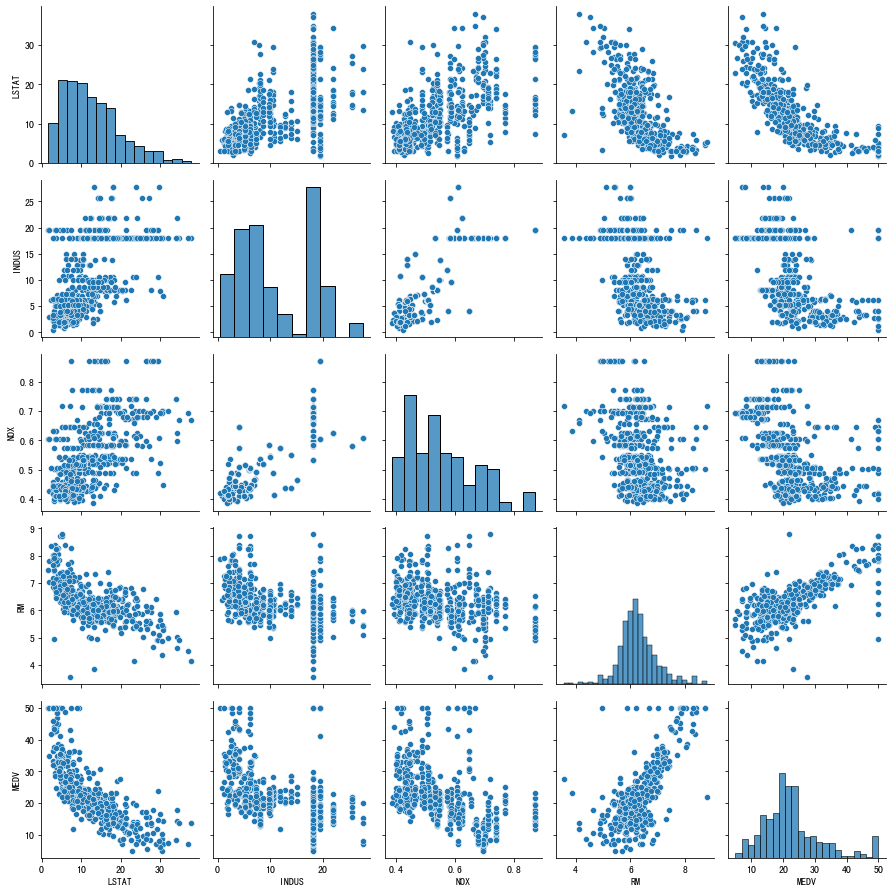

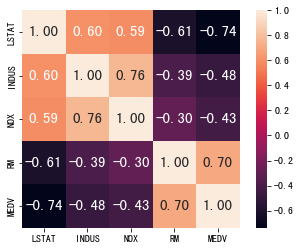

/Users/lyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


mse_test=50.92 r2_test=0.44


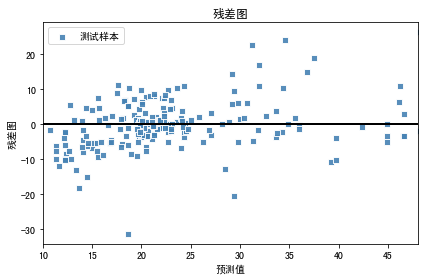

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

if __name__ == '__main__':

	# 加载住房数据集
	df = pd.read_csv('/Users/lyubing/Downloads/机器学习应用实战094095-01/9787302597452 机器学习应用实战/dataset/第6章/housing_dataset/housing.data.txt', header=None, sep='\s+')

	df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
				  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

	# 绘制散点图
	cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
	sns.pairplot(df[cols], height=2.5)
	plt.tight_layout()
	plt.show()

	# 绘制关联矩阵
	cm = np.corrcoef(df[cols].values.T)
	hm = sns.heatmap(cm,
               		 cbar=True,
                 	 annot=True,
               		 square=True,
                 	 fmt='.2f',
                	 annot_kws={'size': 15},
                	 yticklabels=cols,
               		 xticklabels=cols)
	plt.show()

	# 划分训练集和测试集
	X = df['RM'].values
	y = df['MEDV'].values
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

	# 建立随机森林模型
	forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state = 1, n_jobs = -1)
	# 训练
	forest.fit(X_train[:, np.newaxis], y_train)
	# 预测
	y_test_pred = forest.predict(X_test[:, np.newaxis])

	# 评估模型
	mse_test = mean_squared_error(y_test, y_test_pred)
	r2_test = r2_score(y_test, y_test_pred)
	print("mse_test={:.2f} r2_test={:.2f}".format(mse_test, r2_test))

	# 绘制残差图
	plt.scatter(y_test_pred,
				y_test_pred - y_test,
				c='steelblue',
				edgecolor='white',
				marker='s',
				s=35,
				alpha=0.9,
				label=u'测试样本')
	plt.xlabel(u'预测值')
	plt.ylabel(u'残差图')
	plt.legend(loc='upper left')
	plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
	plt.xlim([10, 48])
	plt.title(u'残差图')
	plt.tight_layout()
	plt.show()


